# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Part XI: Risk Parity Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  24 of 24 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.1854%,0.9483%,-1.1953%,...,0.4562%,0.4478%,1.5881%,0.0212%,2.8236%,0.9758%,1.7539%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,0.2412%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-1.1649%,-3.5867%,-0.9551%,...,-1.8165%,-5.8247%,0.5547%,0.0212%,0.1592%,-1.5646%,-1.0155%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-2.5666%,-4.6059%,-2.5394%,...,-3.4783%,-2.5245%,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-0.2700%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2737%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,0.0565%,-1.7642%,-0.1649%,...,0.3067%,-0.1942%,-0.1538%,-1.1366%,-0.7308%,-0.1448%,-3.3839%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5287%,-0.0565%,0.6616%,0.0330%,...,-0.0573%,-5.9682%,1.6435%,0.0000%,0.9869%,-0.1450%,1.4570%,-0.4607%,0.5800%,-1.9918%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,8.8123%,0.0000%,0.0000%,8.9083%,0.0000%,4.3663%,11.8441%,0.0000%,0.0000%,...,15.5039%,0.0000%,9.6324%,0.0000%,0.0000%,0.0000%,7.0719%,0.0000%,3.3381%,0.0000%


### 2.2 Plotting portfolio composition

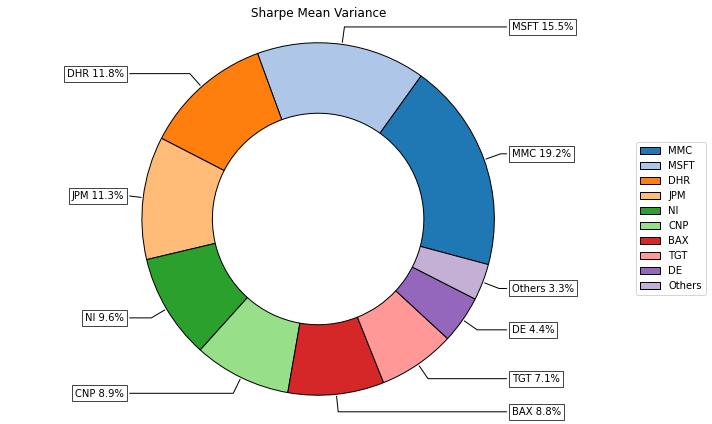

In [4]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Plotting Risk Composition

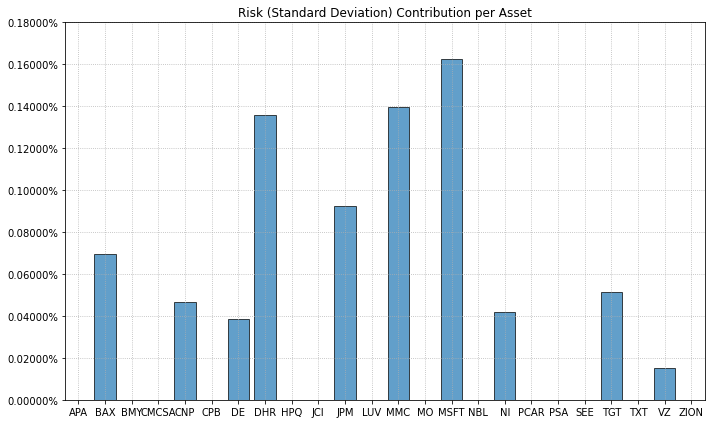

In [5]:
# Plotting the risk composition of the portfolio

ax = plf.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                       color="tab:blue", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for Other Risk Measures

In this part I will calculate risk parity portfolios. First I'm going to calculate risk parity portfolio when we use variance as risk measure, then I'm going to calculate the risk parity portfolios for all available risk measures.

### 3.1 Calculating the risk parity portfolio for variance.

In [13]:
# Select method and estimate worst case input parameters:

method = 'stationary' # Method to estimate uncertainty sets parameters 'b' boostrapping and 'd' delta
q = 0.05 # Confidence level for bootstrapping and k ellipsoidal uncertainty set constraint
n = 1000 # Number of scenarios for bootstrapping
block = 100 # Size of each scenario
dmu = 0.1 # delta to increase or decrease the mean vector
dcov = 0.1 # delta to increase or decrease the covariance matrix

port.worst_stats(method=method, q=q, n=n, block=block, dmu=dmu, dcov=dcov)

Umu = 'box' # Type of uncertainty set for mean vector
Ucov = None # Type of uncertainty set for covariance matrix

w_wc = port.wc_optimization(obj=obj, rf=rf, l=l, Umu=Umu, Ucov=Ucov)

display(w_wc.T)

/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: Empty data passed with indices specified.

In [12]:
display(port.cov_l)

/Users/danycajas/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
APA,0.0279%,-0.0003%,0.0010%,0.0003%,-0.0005%,-0.0033%,0.0028%,-0.0019%,0.0025%,-0.0009%,...,-0.0006%,0.0174%,-0.0042%,0.0017%,-0.0031%,-0.0059%,-0.0012%,0.0034%,-0.0030%,0.0040%
BAX,-0.0003%,0.0052%,0.0010%,-0.0010%,-0.0002%,-0.0008%,0.0005%,0.0011%,0.0010%,0.0008%,...,0.0002%,0.0004%,-0.0001%,-0.0006%,-0.0002%,-0.0000%,-0.0008%,-0.0002%,-0.0004%,-0.0003%
BMY,0.0010%,0.0010%,0.0075%,-0.0012%,-0.0004%,-0.0006%,0.0005%,0.0009%,0.0006%,-0.0003%,...,-0.0000%,0.0000%,-0.0002%,-0.0004%,-0.0017%,0.0004%,0.0007%,-0.0011%,-0.0000%,-0.0018%
CMCSA,0.0003%,-0.0010%,-0.0012%,0.0069%,-0.0006%,-0.0012%,-0.0002%,-0.0005%,0.0006%,0.0005%,...,0.0003%,0.0005%,-0.0009%,0.0005%,-0.0009%,-0.0005%,-0.0006%,0.0009%,0.0006%,0.0009%
CNP,-0.0005%,-0.0002%,-0.0004%,-0.0006%,0.0051%,0.0012%,-0.0007%,-0.0011%,-0.0008%,-0.0034%,...,-0.0003%,-0.0004%,0.0028%,-0.0006%,0.0015%,0.0008%,-0.0039%,-0.0016%,0.0008%,-0.0022%
CPB,-0.0033%,-0.0008%,-0.0006%,-0.0012%,0.0012%,0.0070%,-0.0071%,-0.0010%,-0.0019%,0.0001%,...,-0.0023%,-0.0038%,0.0018%,-0.0019%,0.0016%,0.0005%,-0.0010%,-0.0022%,0.0011%,-0.0018%
DE,0.0028%,0.0005%,0.0005%,-0.0002%,-0.0007%,-0.0071%,0.0085%,0.0005%,0.0006%,-0.0002%,...,0.0014%,0.0030%,-0.0021%,0.0031%,-0.0018%,0.0008%,0.0001%,0.0027%,-0.0011%,0.0022%
DHR,-0.0019%,0.0011%,0.0009%,-0.0005%,-0.0011%,-0.0010%,0.0005%,0.0045%,-0.0002%,0.0007%,...,0.0019%,-0.0021%,-0.0001%,-0.0006%,0.0001%,-0.0008%,-0.0001%,-0.0006%,-0.0005%,-0.0011%
HPQ,0.0025%,0.0010%,0.0006%,0.0006%,-0.0008%,-0.0019%,0.0006%,-0.0002%,0.0098%,0.0005%,...,0.0032%,0.0012%,-0.0014%,0.0017%,-0.0024%,-0.0027%,-0.0006%,0.0017%,-0.0014%,0.0021%
JCI,-0.0009%,0.0008%,-0.0003%,0.0005%,-0.0034%,0.0001%,-0.0002%,0.0007%,0.0005%,0.0074%,...,0.0004%,-0.0015%,-0.0012%,0.0013%,-0.0005%,-0.0039%,0.0005%,0.0022%,-0.0014%,-0.0013%


### 3.2 Plotting portfolio composition

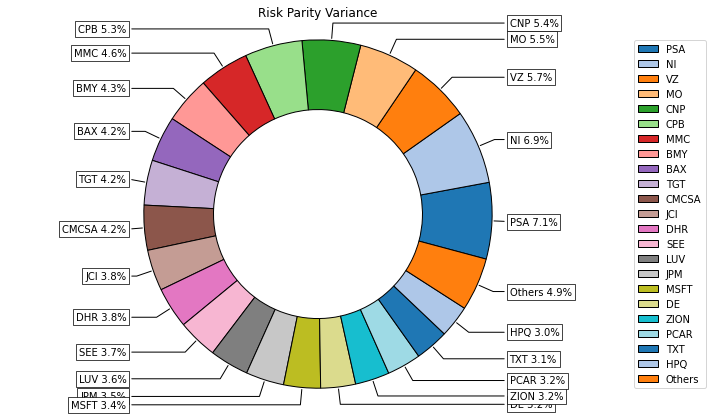

In [7]:
ax = plf.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 3.3  Plotting Risk Composition

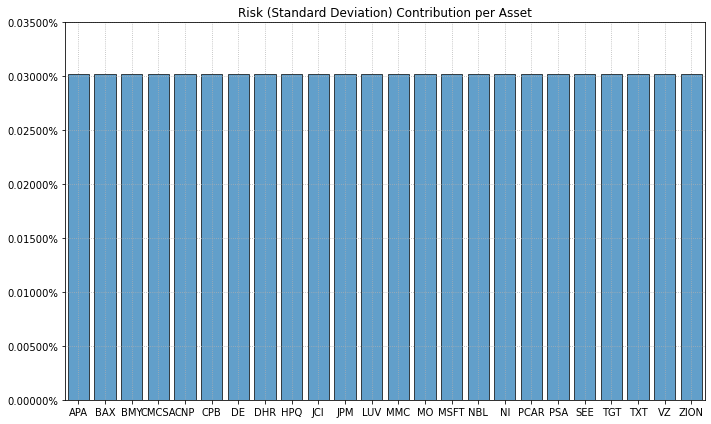

In [8]:
ax = plf.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                       color="tab:blue", height=6, width=10, ax=None)

### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [9]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR', 'CDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.rp_optimization(model=model, rm=i, rf=rf, b=b, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [10]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,CDaR
APA,2.37%,2.12%,2.27%,1.95%,2.36%,2.73%,0.91%
BAX,4.22%,4.37%,4.34%,4.61%,4.20%,3.76%,2.36%
BMY,4.34%,4.61%,4.26%,4.26%,4.27%,4.72%,2.61%
CMCSA,4.17%,4.27%,4.19%,4.36%,4.13%,4.01%,3.97%
CNP,5.42%,5.33%,5.40%,5.28%,5.52%,5.11%,11.28%
CPB,5.34%,4.85%,4.76%,4.60%,5.86%,6.53%,2.86%
DE,3.23%,3.28%,3.43%,3.33%,3.10%,3.01%,7.90%
DHR,3.80%,4.04%,3.71%,4.71%,4.15%,3.83%,4.83%
HPQ,2.99%,3.15%,3.30%,3.09%,2.74%,2.74%,2.06%
JCI,3.81%,3.68%,3.79%,3.70%,3.78%,3.59%,1.88%


<AxesSubplot:>

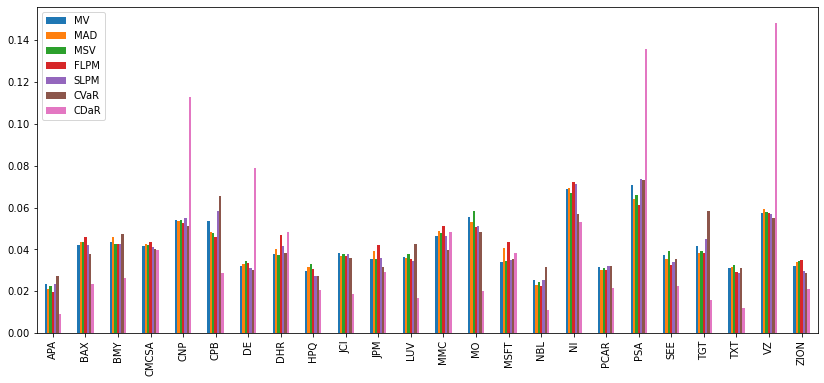

In [11]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)